In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px

In [4]:
df = pd.read_csv('../Data/yield_df.csv')
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


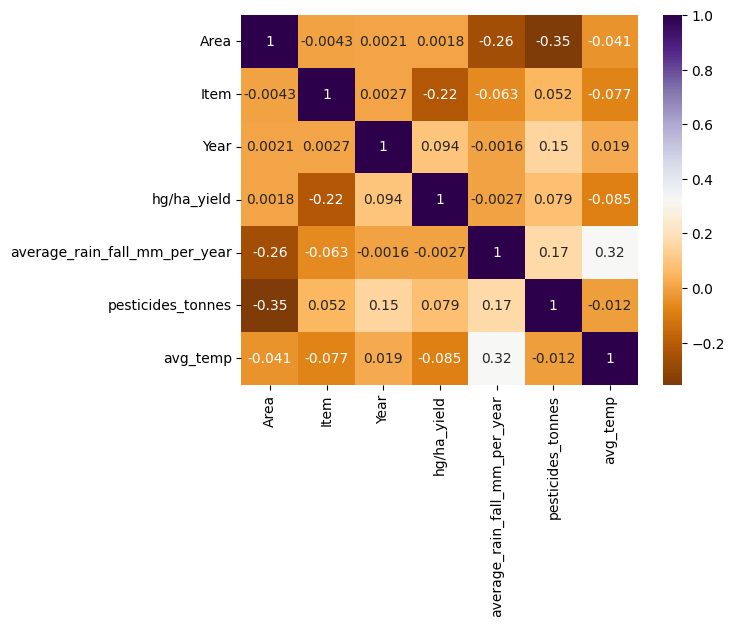

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)
country_counts = df["Area"].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
df = df[~df["Area"].isin(countries_to_drop)].reset_index(drop=True)
datacorr = df.copy()
categorical_columns = datacorr.select_dtypes(include=["object"]).columns.tolist()

label_encoder = LabelEncoder()
for column in categorical_columns:
 datacorr[column] = label_encoder.fit_transform(datacorr[column])
sns.heatmap(datacorr.corr(), annot=True, cmap="PuOr")
plt.show()

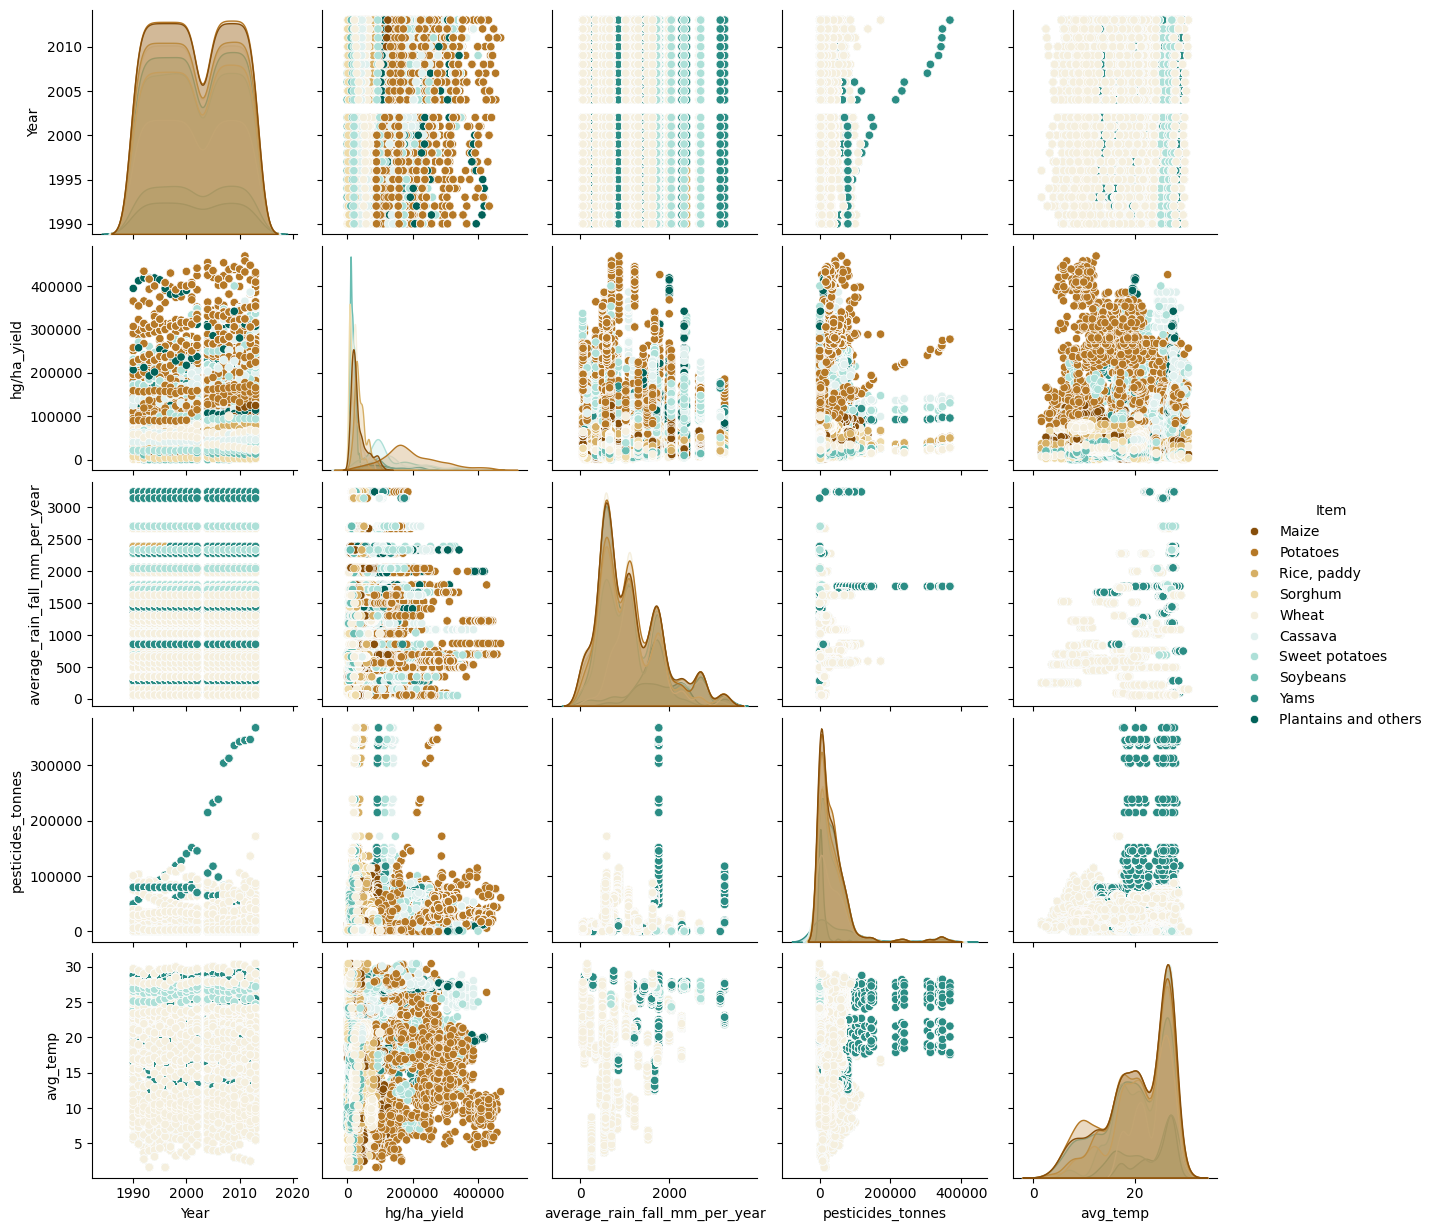

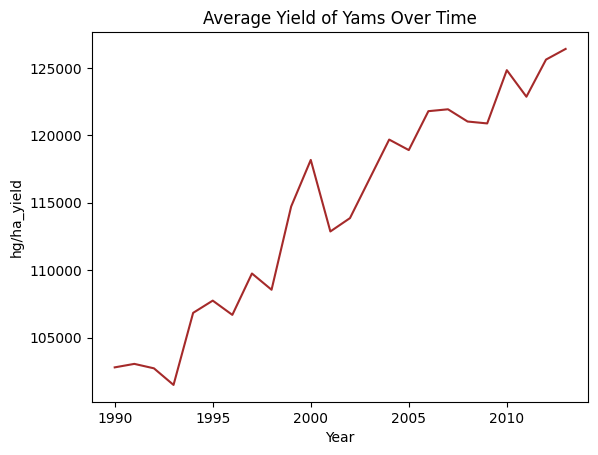

In [6]:
sns.pairplot(data=df, hue="Item", kind="scatter", palette="BrBG")
plt.show()
df2 = df[df["Item"] == "Yams"]
df2.groupby("Year")["hg/ha_yield"].mean().plot(color="brown")
plt.xlabel("Year")
plt.ylabel("hg/ha_yield")
plt.title("Average Yield of Yams Over Time")
plt.show()

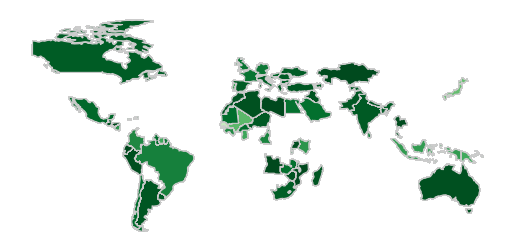

In [7]:
geojson_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
data_geo = gpd.read_file(geojson_url)

merged_data = data_geo.merge(df, left_on="NAME", right_on="Area", how="left")
merged_data.plot(column="hg/ha_yield", cmap="Greens_r", linewidth=0.8, edgecolor="0.8")
plt.axis("off")
plt.show()

del merged_data
del data_geo


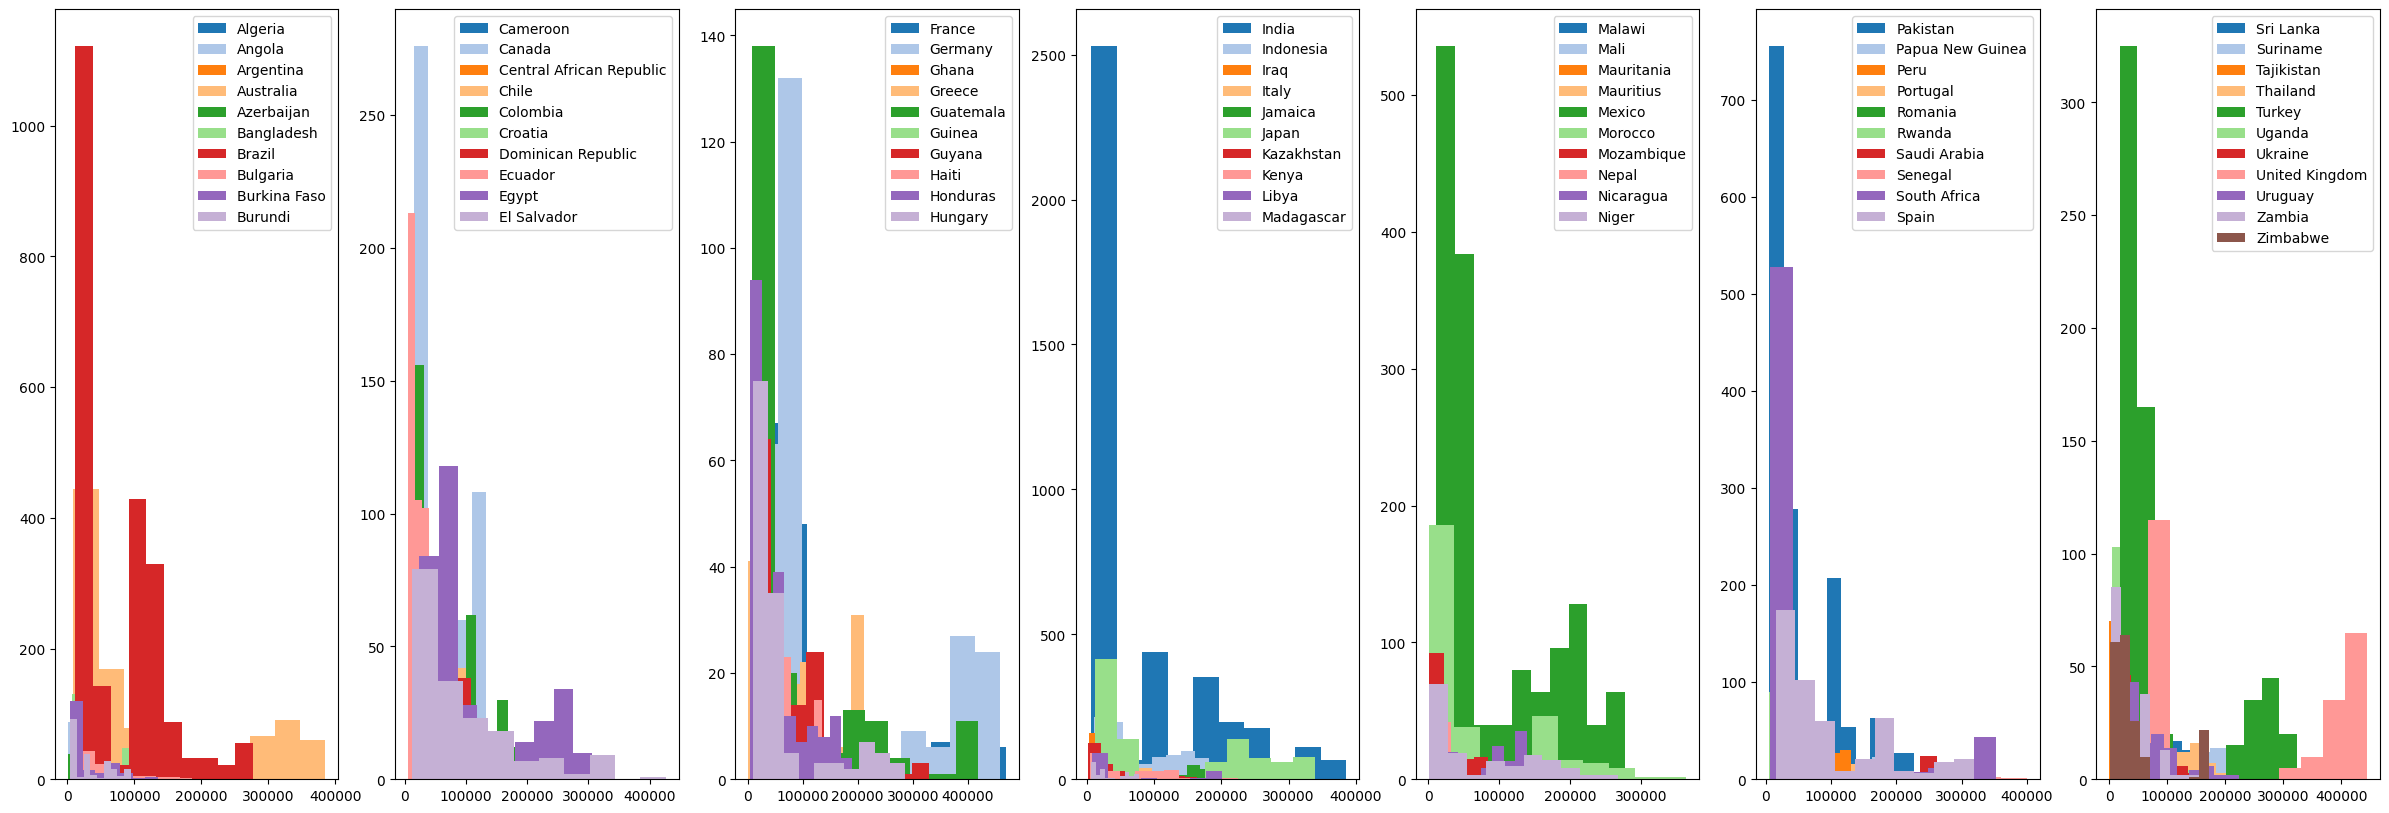

In [12]:
palette = sns.color_palette("tab20", 21)
num_plots = 7
areas_per_plot = 10

unique_areas = sorted(df["Area"].unique())
area_chunks = [unique_areas[i:i+areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]
area_chunks[-2] = unique_areas[-11:]

fig, axs = plt.subplots(ncols=num_plots, figsize=(30, 10))

for idx, ax in enumerate(axs):
    plot_df = df[df["Area"].isin(area_chunks[idx])]
    for j, area in enumerate(plot_df["Area"].unique()):
        segment = plot_df[plot_df["Area"] == area]
        ax.hist(segment["hg/ha_yield"], color=palette[j], label=area)
    ax.legend()

plt.show()


In [13]:
for i in range(7):
	plot_df = df[df["Area"].isin(area_chunks[i])]
	dk = plot_df.groupby(["Area","Item"])["hg/ha_yield"].mean().to_frame()
	display(dk.sort_values("hg/ha_yield", ascending=True).head())

for i in range(7):
	plot_df = df[df["Area"].isin(area_chunks[i])]
	dk = plot_df.groupby(["Area","Item"])["hg/ha_yield"].mean().to_frame()
	display(dk.sort_values("hg/ha_yield", ascending=False).head())

dk_all = df.groupby(["Area","Item"])["hg/ha_yield"].mean().to_frame()
dk_all = dk_all.sort_values("hg/ha_yield", ascending=False)
display(dk_all)

hg/ha_yield
Area       Item                 
Angola     Sorghum   2926.769231
Azerbaijan Sorghum   3324.166667
Angola     Soybeans  4235.538462
           Maize     5753.869565
Azerbaijan Soybeans  7599.850000

hg/ha_yield
Area                     Item                  
Ecuador                  Wheat      7111.956522
Cameroon                 Soybeans   7566.782609
Central African Republic Sorghum    9353.913043
                         Maize     10250.869565
Cameroon                 Sorghum   11521.304348

hg/ha_yield
Area     Item                 
Honduras Wheat     5574.130435
Haiti    Maize     7905.565217
         Sorghum   8157.913043
Ghana    Sorghum  10291.347826
Honduras Sorghum  10863.782609

hg/ha_yield
Area       Item                 
Madagascar Soybeans  6267.173913
           Sorghum   6452.304348
Kenya      Sorghum   7744.478261
India      Sorghum   8452.434783
Libya      Wheat     8459.521739

,,hg/ha_yield
Area,Item,
Niger,Sorghum,2592.913043
Mauritania,Sorghum,4673.869565
Mozambique,Sorghum,4830.304348
Malawi,Sorghum,6403.086957
Morocco,Sorghum,6594.739130


,,hg/ha_yield
Area,Item,
Pakistan,Sorghum,6056.043478
Rwanda,Soybeans,6664.869565
Senegal,Sorghum,8159.173913
Pakistan,Soybeans,9276.000000
Rwanda,Sorghum,10969.478261


,,hg/ha_yield
Area,Item,
Tajikistan,Soybeans,941.750000
Zimbabwe,Sorghum,3864.956522
Zambia,Sorghum,6809.608696
Thailand,Wheat,7547.000000
Suriname,Soybeans,9039.869565


,,hg/ha_yield
Area,Item,
Australia,Potatoes,330944.826087
Argentina,Potatoes,262059.173913
Australia,Sweet potatoes,257610.826087
Brazil,Potatoes,196056.000000
Algeria,Potatoes,182413.956522


hg/ha_yield
Area        Item                               
Egypt       Sweet potatoes        261369.347826
            Potatoes              235444.956522
El Salvador Potatoes              211362.304348
            Plantains and others  198605.217391
Chile       Potatoes              184835.260870

hg/ha_yield
Area      Item                               
France    Potatoes              395037.260870
Germany   Potatoes              386553.347826
Guatemala Plantains and others  291096.304348
          Potatoes              241157.869565
Hungary   Potatoes              210372.782609

hg/ha_yield
Area  Item                         
Japan Potatoes        311005.260870
India Cassava         282234.434783
Italy Potatoes        237861.347826
Japan Sweet potatoes  237639.391304
      Yams            211343.434783

,,hg/ha_yield
Area,Item,
Mexico,Potatoes,228553.695652
Morocco,Potatoes,217065.695652
Mauritius,Potatoes,211356.869565
Mali,Potatoes,195653.869565
Mexico,Sweet potatoes,194611.913043


,,hg/ha_yield
Area,Item,
South Africa,Potatoes,297195.434783
Spain,Potatoes,251421.695652
Saudi Arabia,Potatoes,223336.652174
Senegal,Potatoes,180499.608696
Papua New Guinea,Yams,172521.173913


hg/ha_yield
Area           Item                               
United Kingdom Potatoes              406131.695652
Turkey         Potatoes              265486.565217
Suriname       Plantains and others  253966.913043
               Cassava               191282.478261
Tajikistan     Potatoes              176549.190476

,,hg/ha_yield
Area,Item,
United Kingdom,Potatoes,406131.695652
France,Potatoes,395037.260870
Germany,Potatoes,386553.347826
Australia,Potatoes,330944.826087
Japan,Potatoes,311005.260870
...,...,...
Zimbabwe,Sorghum,3864.956522
Azerbaijan,Sorghum,3324.166667
Angola,Sorghum,2926.769231


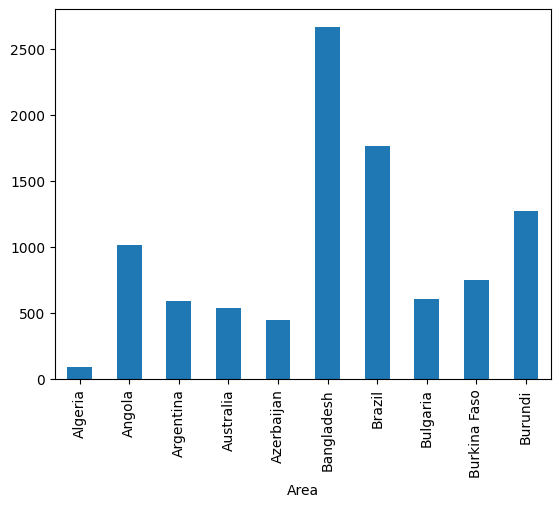

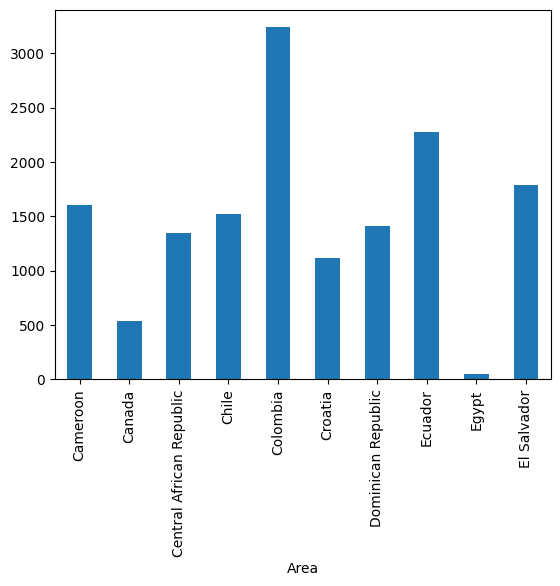

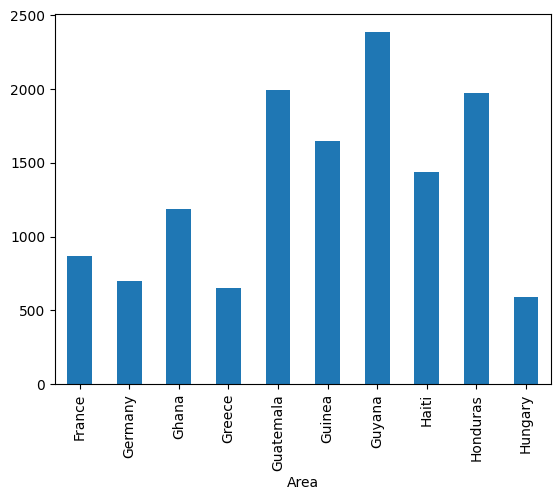

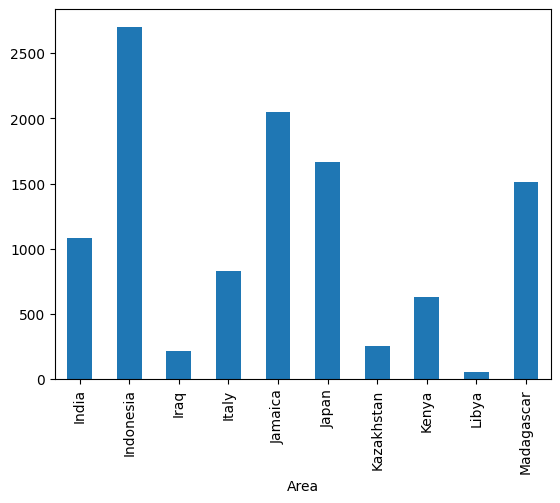

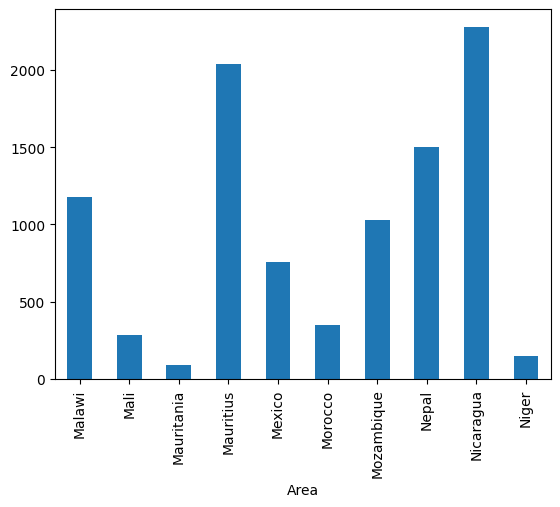

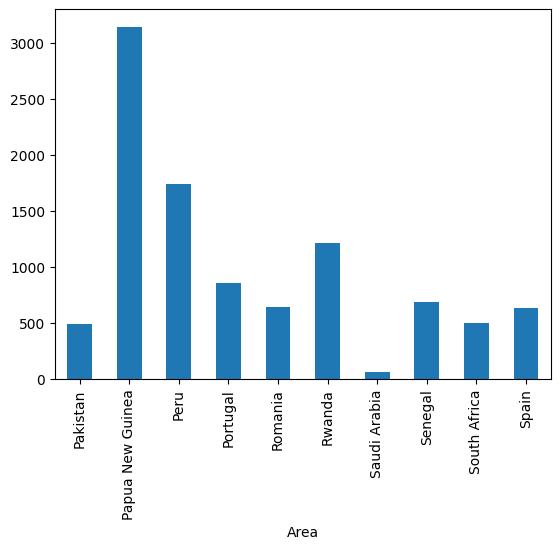

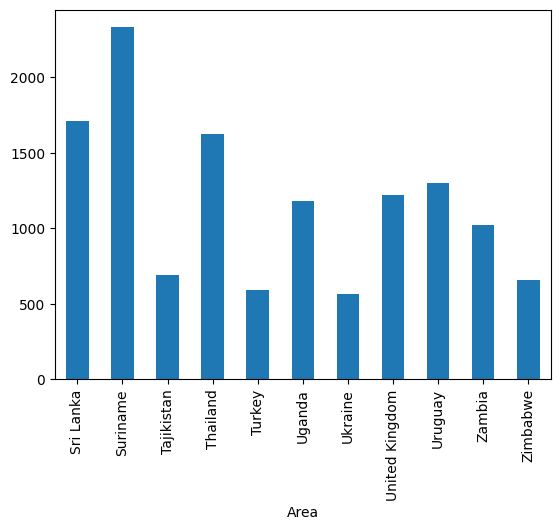

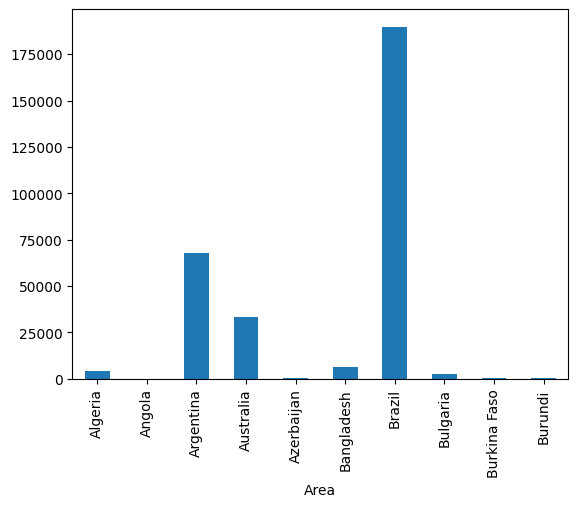

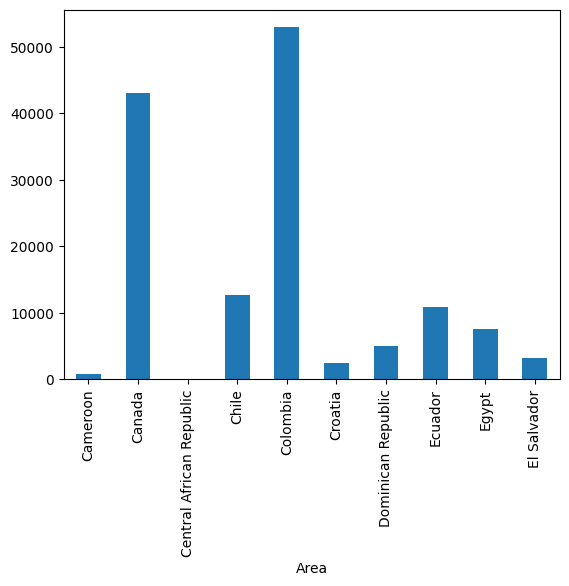

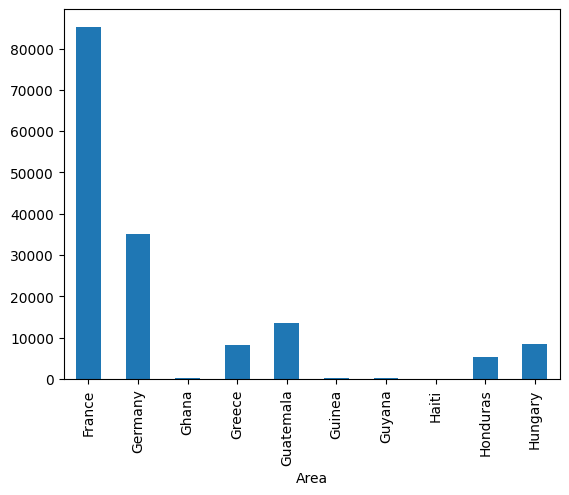

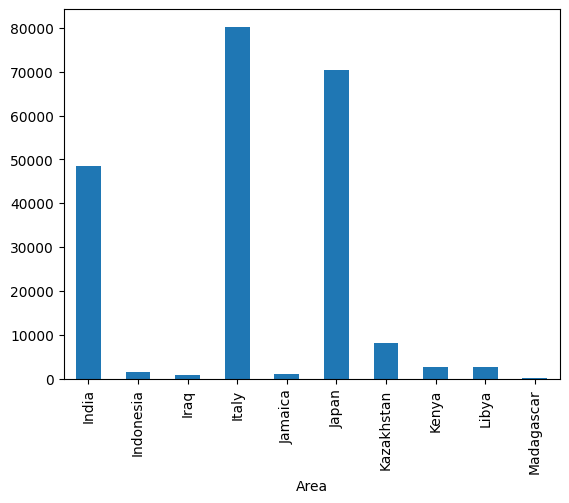

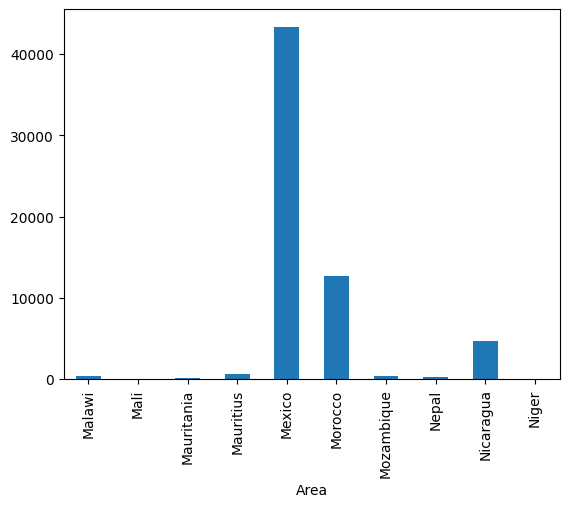

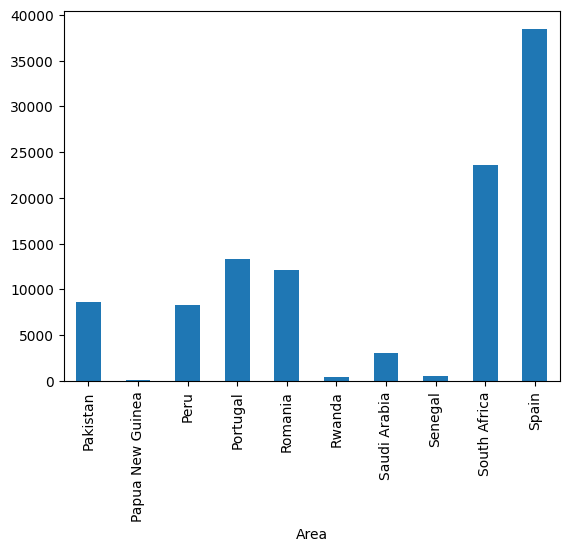

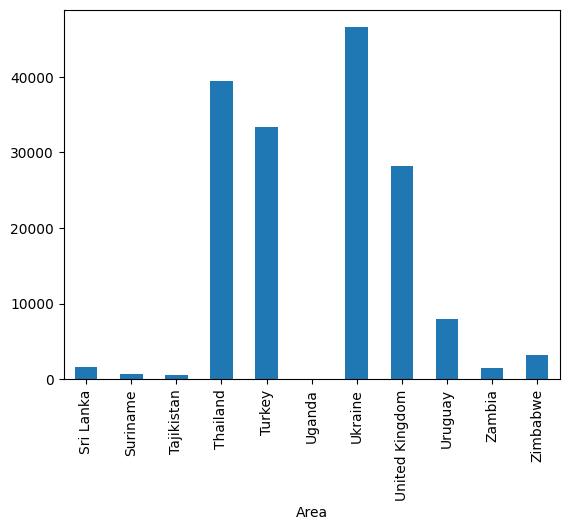

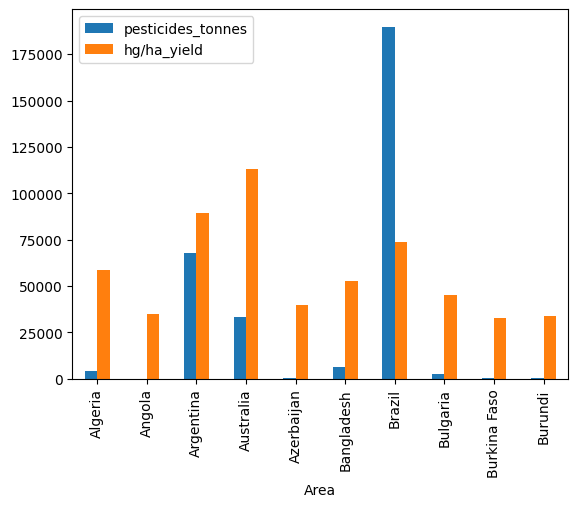

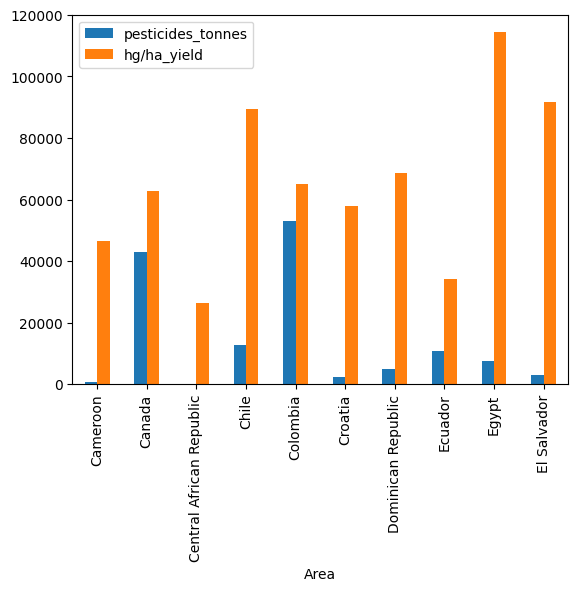

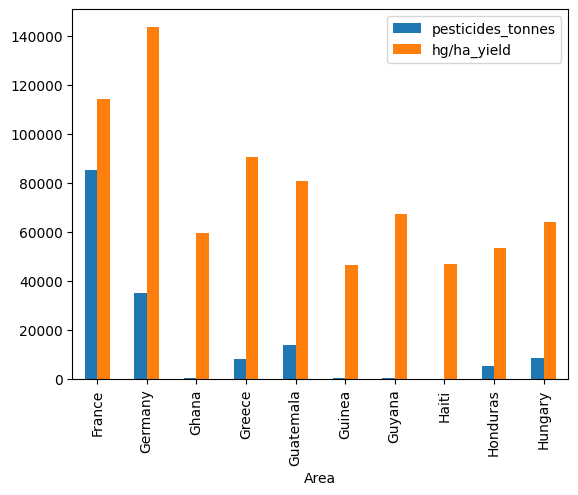

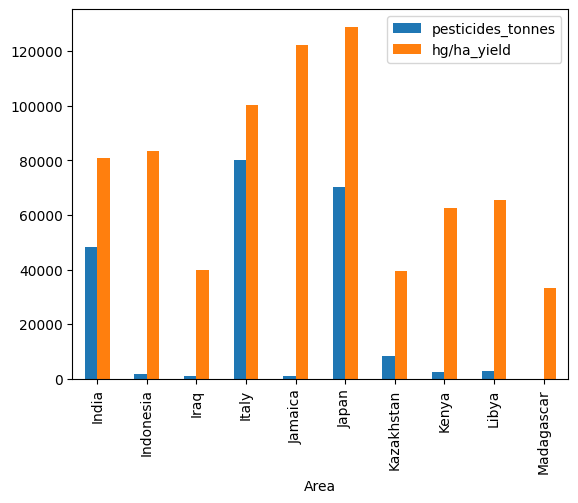

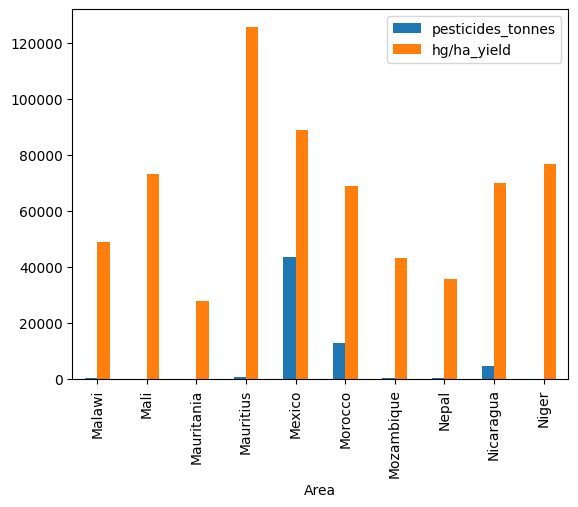

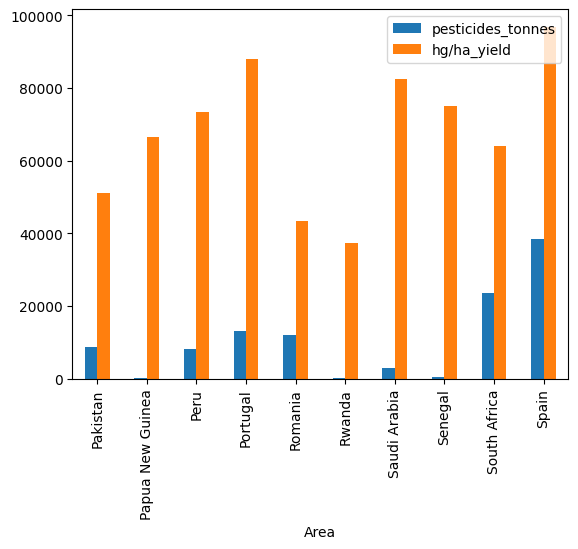

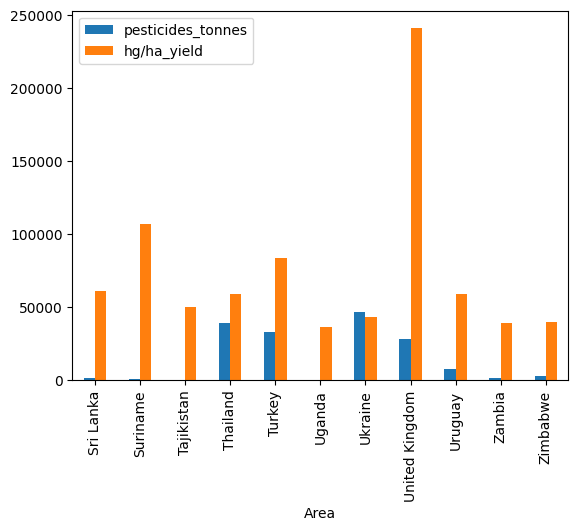

<Figure size 640x480 with 0 Axes>

In [14]:
for i in range(7):
    df[df["Area"].isin(area_chunks[i])].groupby("Area") \
        ["average_rain_fall_mm_per_year"].mean().plot(kind="bar", rot=90)
    plt.show()

for i in range(7):
    df[df["Area"].isin(area_chunks[i])].groupby("Area") \
        ["pesticides_tonnes"].mean().plot(kind="bar", rot=90)
    plt.show()

for i in range(7):
    df[df["Area"].isin(area_chunks[i])].groupby("Area") \
        [["pesticides_tonnes", "hg/ha_yield"]].mean().plot(kind="bar", rot=90)
    plt.show()

fig, axs = plt.subplots(ncols=7)

for idx, ax in enumerate(axs):
    plot_df = df[df["Area"].isin(area_chunks[idx])]
    fig_px = px.scatter(
        plot_df,
        x="hg/ha_yield",
        y="pesticides_tonnes",
        color="Area"
    )
    fig_px.show()

plt.clf()
